<a href="https://colab.research.google.com/github/kimdoo33669/python/blob/main/%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (17.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and dir

In [ ]:
# Python3 샘플 코드 #


import requests

url = 'http://apis.data.go.kr/1360000/TyphoonInfoService/getTyphoonInfo'
para ={'serviceKey' : 'nvivoYHrQ8eg87/fao9WMMjcSOD5CRo+PPIT54zusBS/YifWPv3r5YCB5BCIJJgh7ulWIuAHuuBVf3ftqzWb+w==', 'pageNo' : '1', 'numOfRows' : '100', 'dataType' : 'JSON', 'fromTmFc' : '20120928', 'toTmFc' : '20120928' }

res = requests.get(url,params=para)
print(res.content)

b'{"response":{"header":{"resultCode":"99","resultMsg":"\xec\xb5\x9c\xeb\x8c\x80 \xec\xa1\xb0\xed\x9a\x8c \xea\xb8\xb0\xea\xb0\x84\xec\x9d\x80 \xec\x98\xa4\xeb\x8a\x98 \xea\xb8\xb0\xec\xa4\x80\xec\x9c\xbc\xeb\xa1\x9c 3\xec\x9d\xbc \xec\xa0\x84\xea\xb9\x8c\xec\xa7\x80\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."}}}'


In [ ]:
import json
json_file = json.loads(res.text)

In [ ]:
import pandas as pd

from pandas import json_normalize
df = json_normalize(json_file['response']['header'])
df

,resultCode,resultMsg
0,99,최대 조회 기간은 오늘 기준으로 3일 전까지입니다.


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False

In [ ]:
from matplotlib import font_manager, rc

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [ ]:
import matplotlib.pyplot as plt
df['tm'] = pd.to_datetime(df['tm'])
df['ts'] = pd.to_numeric(df['ts'], downcast='float')

fig=plt.figure(figsize=(14,6))
ax=plt.subplot(1,1,1)

ax.plot(df['tm'],df['ts'], color='r',lw=1.5,alpha=0.7)

ax.set_xlabel('Date 날짜', fontweight='bold',fontsize=12)
ax.set_ylabel('Surface Temperature', fontweight='bold', fontsize=12)
ax.set_title('OPEN API ASOS ',fontweight='bold',fontsize=12

SyntaxError: ignored

In [ ]:
import matplotlib.pyplot as plt
df['tm'] = pd.to_datetime(df['tm'])
df['ta'] = pd.to_numeric(df['ta'], downcast='float')

fig=plt.figure(figsize=(14,6))
ax=plt.subplot(1,1,1)

ax.plot(df['tm'],df['ts'], color='blue',lw=1.5,alpha=0.7)

ax.set_xlabel('Date 날짜', fontweight='bold',fontsize=12)
ax.set_ylabel('Ari Temperature', fontweight='bold', fontsize=12)
ax.set_title('OPEN API ASOS 온도 데이터',fontweight='bold',fontsize=14)

NameError: ignored

NameError: ignored

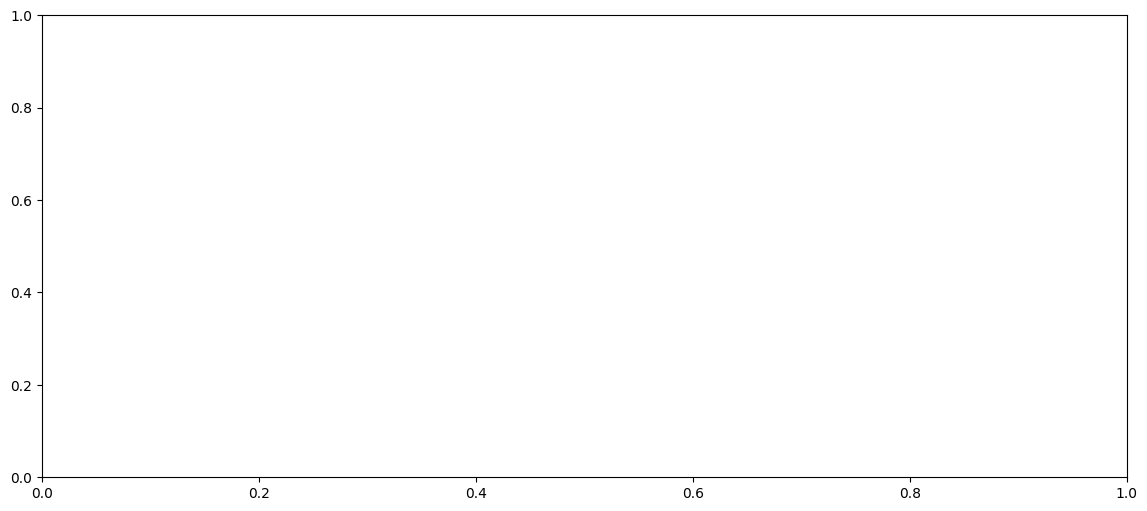

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['tm'], df['ts'], color='blue', lw=1.5, alpha=0.8, label='표면온도')
ax.plot(df['tm'], df['ta'], color='red', lw=1.5, alpha=0.8, label='air 온도')
ax.legend()
plt.show()

In [ ]:
import requests
import matplotlib.pyplot as plt

# API 요청
url = "http://api.data.go.kr/iim/api/selectAPIAcountView.do"  # API 엔드포인트
params = {
    "serviceKey": "nvivoYHrQ8eg87/fao9WMMjcSOD5CRo+PPIT54zusBS/YifWPv3r5YCB5BCIJJgh7ulWIuAHuuBVf3ftqzWb+w==",  # 인증키 입력
    "type": "json",  # 응답 타입 설정
    "typSp": "YOUR_TYPSP_VALUE",  # typSp 파라미터 설정
    "typPs": "YOUR_TYPPS_VALUE",  # typPs 파라미터 설정
    "typWs": "YOUR_TYPWS_VALUE"  # typWs 파라미터 설정
}

response = requests.get(url, params=params)
data = response.json()

# 데이터 추출 및 가공
x_values = [item["x"] for item in data["result"]["items"]]
y_values = [item["y"] for item in data["result"]["items"]]

# 그래프 그리기
plt.plot(x_values, y_values)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Graph")
plt.show()


JSONDecodeError: ignored